# Logistic Regression

For solving our binary classification problem - i. e. differentiating between adopted animals and those who do not get adopted for one reason or another - we opted for a logistic regression model. In order to properly fit this binary model to our data we have to split the outcome types of all our instances into two distinct classes, which we did below. This of course introduces some simplification and abstraction into our data - given the fact that with this model we do not predict all the initial classes. Nevertheless as you can see from the performance measurements, which are also provided below, the logistic regression model produces good and accurate results and thus is sufficient for our main question: Which animals are less likely to be adopted and could therefore be pushed via ads for example?

In [37]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('data/transformed_data_num.csv', index_col=0)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [40]:
pd.set_option('display.max_rows', None)

In [41]:
data.head()

,outcometype,animaltype,sex,age,neutralized,colormix,breedmix,apricot,black,black.1,...,tibetan terrier,toy fox terrier,toy poodle,treeing walker coonhound,vizsla,weimaraner,west highland,whippet,wire hair fox terrier,yorkshire terrier
AnimalID,,,,,,,,,,,,,,,,,,,,,
0,Return_to_owner,1.0,0.0,0.090683,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Euthanasia,0.0,1.0,0.090683,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Adoption,1.0,0.0,0.181614,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Transfer,0.0,0.0,0.004997,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Transfer,1.0,0.0,0.181614,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
data.outcometype.value_counts()

Adoption           10574
Transfer            8292
Return_to_owner     4426
Euthanasia          1304
Died                 168
Name: outcometype, dtype: int64

In [43]:
data_ml = data
data_ml = data_ml.dropna()
data_ml["outcometype"] = data_ml["outcometype"].replace({'Return_to_owner':'Adoption'}) # classify Return_to_owner as adopted to have fewer misclassifications for animals who do not get adopted
data_ml["outcometype"] = (data_ml["outcometype"] == "Adoption").astype(np.int) # if adopted 1 else 0
data_ml.head()

,outcometype,animaltype,sex,age,neutralized,colormix,breedmix,apricot,black,black.1,...,tibetan terrier,toy fox terrier,toy poodle,treeing walker coonhound,vizsla,weimaraner,west highland,whippet,wire hair fox terrier,yorkshire terrier
AnimalID,,,,,,,,,,,,,,,,,,,,,
0,1,1.0,0.0,0.090683,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,1.0,0.090683,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0.0,0.181614,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.004997,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.181614,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='outcometype', ylabel='count'>

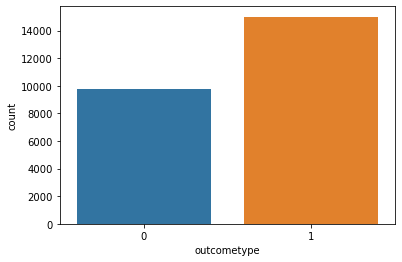

In [44]:
sns.countplot(x = "outcometype", data = data_ml) # pretty even distribution

In [45]:
y = data_ml["outcometype"]
x = data_ml.loc[:, ~data_ml.columns.isin(["outcometype"])]
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.33, random_state=42) # splitting in training & test data

In [46]:
log_reg = LogisticRegression(max_iter = 200)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [47]:
pred_train = log_reg.predict(x_train)
pred_test = log_reg.predict(x_test)

In [48]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.84      0.59      0.69      6479
           1       0.78      0.93      0.85     10112

    accuracy                           0.80     16591
   macro avg       0.81      0.76      0.77     16591
weighted avg       0.80      0.80      0.79     16591



In [49]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.60      0.70      3285
           1       0.77      0.93      0.84      4888

    accuracy                           0.80      8173
   macro avg       0.81      0.76      0.77      8173
weighted avg       0.80      0.80      0.79      8173



In [50]:
feature_names = x.columns.tolist()

coefs = pd.DataFrame(
    log_reg.fit(x_train, y_train).coef_.T,
    columns=["Coefficients"],
    index=feature_names,
)

coefs.sort_values(by=['Coefficients'], ascending=False)

,Coefficients
neutralized,2.924700
cavalier span,1.793868
english bulldog,1.508931
vizsla,1.175110
blue cream,1.000092
bichon frise,0.950112
alaskan husky,0.926984
shiba inu,0.918302
affenpinscher,0.891686
dalmatian,0.807053


The most prominent predictor by a large margin is whether or not an animal is neutered, which also corresponds to our initial EDA results. Furthermore on both ends of the range of the coefficients some particular breeds seem to have a distinctive power regarding the adoption rate. For a more detailed exploration of these breeds compare our eda notebook.

## Confusion matrix

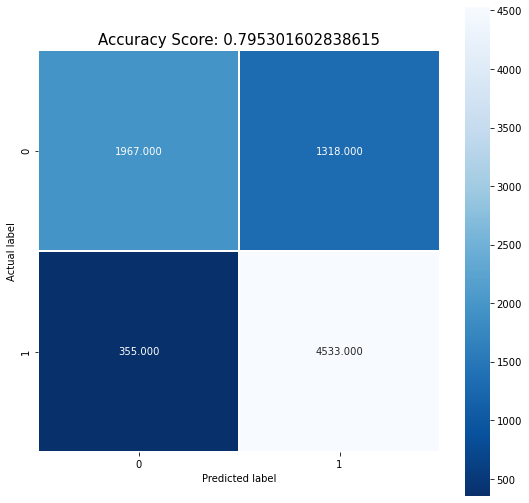

In [51]:
cm = confusion_matrix(y_test, pred_test)
score = log_reg.score(x_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Although overall the model produces solid results and great accuracy, as well as presentable recall and precision it still seems to have some problems with false positives - i. e. it missclassifies animals, which actually do not get adopted as adopted. This might mainly be explained by a slight skewedness of our data towards adopted animals (positive instances).

## ROC-curve

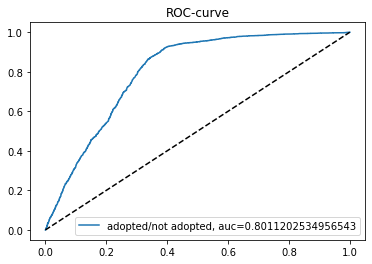

In [52]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, thresholds= metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="adopted/not adopted, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.legend(loc=4)
plt.title("ROC-curve")
plt.show()

The ROC-curve shows in particular the advantage we gain on our model compared to a random classifier where the overall accuracy amounts to only 50%. The performance of our logistic regression model is displayed via the blue curve while the grey doted line indicates the random classifier. In addition the AUC-score (Area under the curve) measures how good our model performs in separating distinct class instances (e. g. positives and negatives) from one another.